<div style="width: 50%; float: left">
    <img src="../ups2.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>EXAMEN: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">EXAMEN PRÁCTICO</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Examen Práctico de Interciclo
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
#import matplotlib.patches as mpatches
#from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from collections import Counter
#import nltk
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('Data.csv')
df['Tweet'] = [str(tweet).strip().replace('.', '').replace(':', '').replace('\n', '') for tweet in df['Tweet']]
df['Tweet'] = df['Tweet'].str.lower()
df['Comment'] = [comment.replace('.','').replace('K','')+'00' if '.' in comment else comment.replace('K','')+'000' if 'K' in comment else comment for comment in df['Comment']]
df['Share'] = [share.replace('.','').replace('K','')+'00' if '.' in share else share.replace('K','')+'000' if 'K' in share else share for share in df['Share']]
df['Like'] = [like.replace('.','').replace('K','')+'00' if '.' in like else like.replace('K','')+'000' if 'K' in like else like for like in df['Like']]
df['Like'] = df['Like'].apply(pd.to_numeric)
df['#Words'] = [len(str(tweet).split(' ')) for tweet in df['Tweet']]
df['#HashTags'] = [len(str(tweet).split('#'))-1 for tweet in df['Tweet']]
df['#Tags'] = [len(str(tweet).split('@'))-1 for tweet in df['Tweet']]

df = df.sort_values(by=['Like']).reset_index(drop=True)

In [3]:
tweets = [word for word in " ".join(df["Tweet"]).split() if word not in stopwords.words('spanish')]
words = Counter(tweets).most_common(20)
freq = [i[0] for i in words]

In [4]:
Frequency = [len([i for i in freq if i in tweet]) for tweet in df['Tweet']]
df['Frequency'] = Frequency
df.head(15)

,User,Date,Tweet,Comment,Share,Like,#Words,#HashTags,#Tags,Frequency
0,Guillermo Lasso,10-Mar,garantizaremos la transparencia y mecanismos d...,16,17,70,28,0,0,1
1,AsíAmaneció,8-Mar,al aire periodistas ecuatorianas mujeres parti...,22,41,167,21,1,2,0
2,Red de Periodistas Libres #RPL,9-Mar,"#buenasnoches | a las 2000, miembros de la @rp...",14,42,178,27,6,3,1
3,Movimiento CREO Ecuador,9-Feb,"el 135% del total de las actas representa a 1,...",43,55,230,34,1,0,1
4,Guillermo Lasso,11-Mar,encuentros como este enriquecen al país trabaj...,25,91,298,36,0,0,5
5,Josué Sanchez,4-Feb,¡#guayaquil votará por el equipo del cambio! e...,12,74,317,39,3,0,9
6,Guillermo Lasso,9-Mar,muchas gracias a los ganaderos que asistieron ...,25,64,326,25,1,0,4
7,Guillermo Lasso,23-Feb,muchas gracias a quienes se conectaron al en v...,41,39,351,19,0,0,2
8,Guillermo Lasso,11-Mar,"hoy a las 17h00, #encontrémonosporlaruralidad ...",47,108,376,7,1,0,1
9,Guillermo Lasso,7-Feb,¡ahora! rueda de prensa sobre las elecciones d...,52,56,397,11,1,0,1


In [5]:
TRwords, TSwords, TRhashtags, TShashtags, TRtags, TStags, TRfreq, TSfreq, TRlikes, TSlikes = tts(df['#Words'], df['#HashTags'], df['#Tags'], df['Frequency'], df['Like'], test_size=0.2)

In [6]:
X = pd.DataFrame([TRwords, TRhashtags, TRtags, TRfreq]).T

In [7]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X) 
var = svd.explained_variance_ratio_
X_svd = pd.DataFrame(data = X_svd)
X_svd = X_svd.sort_values(by=[0]).values

In [8]:
clf=SVC(C=1,kernel="linear")
clf.fit(X_svd, TRlikes)
pred = clf.predict(X_svd)

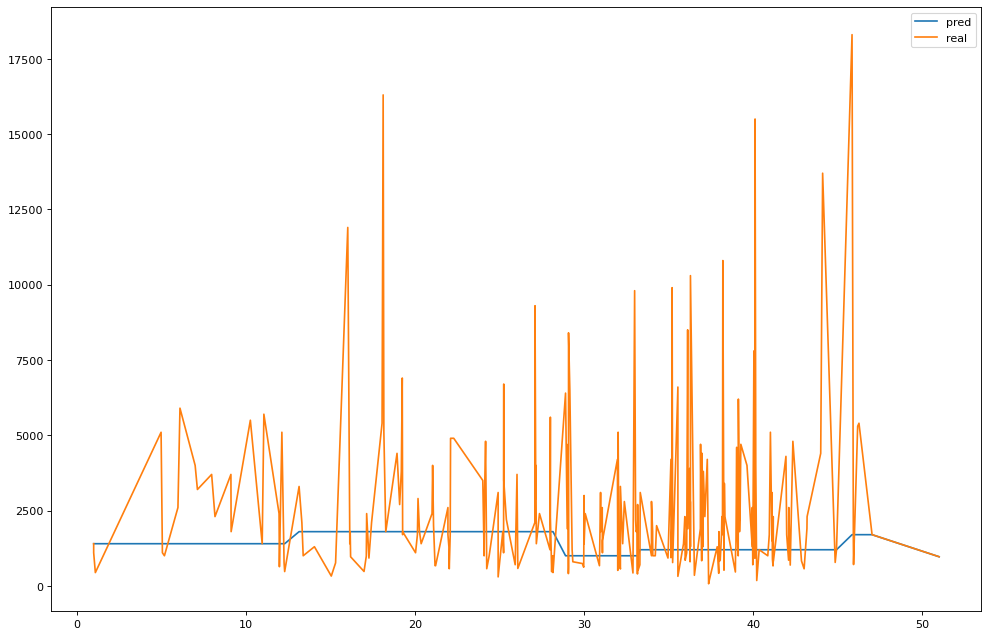

In [9]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(X_svd, pred, label='pred')
plt.plot(X_svd, TRlikes, label='real')
plt.legend()
plt.show()

In [10]:
Xpred = pd.DataFrame([TSwords, TShashtags, TStags, TSfreq]).T

In [11]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
Xpred_svd = svd.fit_transform(Xpred) 
var = svd.explained_variance_ratio_
Xpred_svd = pd.DataFrame(data = Xpred_svd)
Xpred_svd = Xpred_svd.sort_values(by=[0]).values

In [12]:
pred = clf.predict(Xpred_svd)

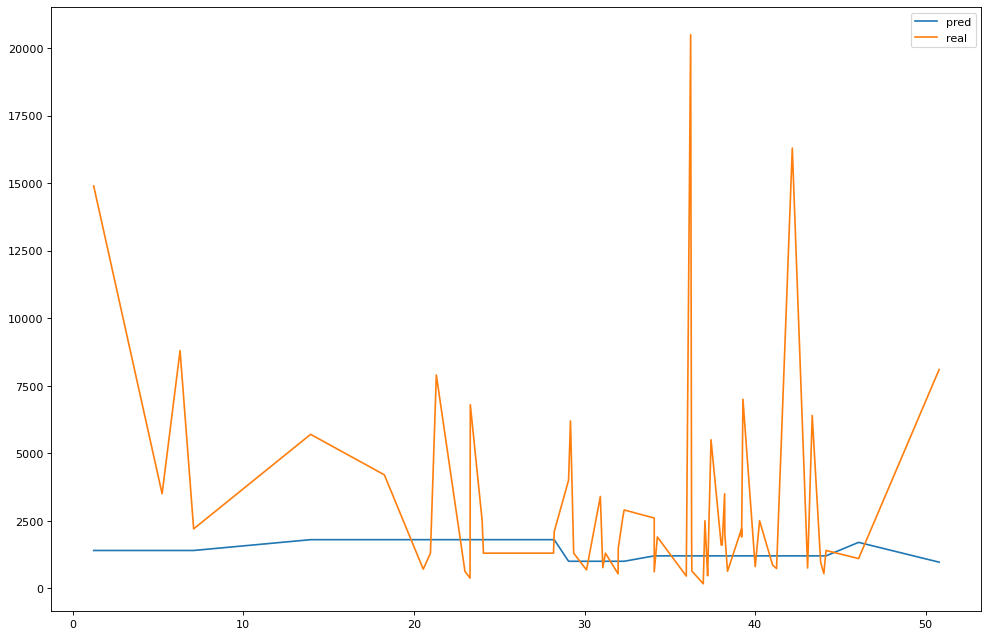

In [13]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(Xpred_svd, pred, label='pred')
plt.plot(Xpred_svd, TSlikes, label='real')
plt.legend()
plt.show()

In [14]:
mse = mean_squared_error(TSlikes, pred)
mse

18530459.508196723

In [16]:
mae = mean_absolute_error(TSlikes, pred)
mae

2302.1967213114754

### Simulación sistema de vacunación

In [2]:
import simpy
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Se toma uno de los recintos en la parroquia El Batán de Cuenca. En esta zona hay 12738 personas que deberán votar en uno de los tres Recintos Electorales [1]. Suponiendo que todas las personas se reparten equitativamente en los 3 recintos, en cada recinto se atenderán a 4246 personas. 

Puesto a que sólo el 80% 

In [82]:
TOTAL_PACIENTES = 50
PUNTOS_VACUNACION0 = 6
PUNTOS_VACUNACION = 6
PUNTOS_VACUNACION2 = int(PUNTOS_VACUNACION/2)
DIAS = 100

vacunados1 = []
no_vacunados1 = []

s1 = 0
n1 = 0

vacunados2 = []
no_vacunados2 = []

s2 = 0
n2 = 0

class Centro_Covid(object):
    def __init__(self, env, puntos_vacunacion):
        self.env = env
        self.puntos_vacunacion = simpy.Resource(env, puntos_vacunacion)
        
    def poner_vacuna(self, paciente, dosis):
        global s1
        global s2
        print('> El %s va a vacunarse a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(random.randint(5,10))
        print('> El %s ha sido vacunado a las %.2f. %s' % (paciente, env.now, dosis))
        if '1' in dosis:
            s1+=1
        else:
            s2+=1
    
    def esperar(self, paciente, dosis):
        print('_  El %s comienza su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(20)
        print('_  El %s termina su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.process(self.certificar(paciente, dosis))
        
    def certificar(self, paciente, dosis):
        print('@   El %s va a recibir su certificado a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(random.randint(2,3))
        print('@   El %s ha recibido su certificado a las %.2f. %s y sale del recinto' % (paciente, env.now, dosis))
        
def llega_paciente(env, paciente, centro_covid, dosis):
    global n1
    global n2
    print('El %s llega al centro de vacunación a las %.2f. %s' % (paciente, env.now, dosis))
    with centro_covid.puntos_vacunacion.request() as punto_vacunacion:
        if random.randint(1,10) < 9:
            yield punto_vacunacion
            yield env.process(centro_covid.poner_vacuna(paciente, dosis))
            env.process(centro_covid.esperar(paciente, dosis))
        else:
            print('! El %s no ha podido vacunarse la %s y sale del recinto a las %.2f.' % (paciente, dosis, env.now))
            if '1' in dosis:
                n1+=1
            else:
                n2+=1

def ejecutar(env, puntos_vacunacion, dosis):
    centro_covid = Centro_Covid(env, puntos_vacunacion)
    for i in range(PUNTOS_VACUNACION):
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))
        
    while True:
        yield env.timeout(random.randint(1,5))
        i+=1
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))
    
random.seed(88)

for i in range(100):
    print()
    print('------ DÍA ' + str(i+1) + ' ------')
    print()
    
    s1 = 0
    n1 = 0
    s2 = 0
    n2 = 0
    
    env = simpy.Environment()
    if i >= 30:
        env.process(ejecutar(env, PUNTOS_VACUNACION, '2da dosis'))
        if sum(vacunados1) < 3397:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION2
        else:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION0
    
    if sum(vacunados1) < 3397:
        env.process(ejecutar(env, PUNTOS_VACUNACION, '1ra dosis'))

        
    env.run(until=TOTAL_PACIENTES)
    
    vacunados1.append(s1)
    no_vacunados1.append(n1)
    vacunados2.append(s2)
    no_vacunados2.append(n2)



------ DÍA 1 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 1ra dosis
! El Paciente 5 no ha podido vacunarse la 1ra dosis y sale del recinto a las 0.00.
El Paciente 6 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 6 va a vacunarse a las 0.00. 1ra dosis
El Paciente 7 llega al centro de vacunación a las 4.00. 1ra dosis
> El Paciente 7 va a vacunarse a las 4.00. 1ra dosis
El Paciente 8 llega al centro de vacunación a las 5.00. 1ra dosis
> El Paciente 4 ha sido vacunado a las 6.00. 1ra 

_  El Paciente 19 comienza su tiempo de espera a las 44.00. 1ra dosis
@   El Paciente 11 ha recibido su certificado a las 45.00. 1ra dosis y sale del recinto
@   El Paciente 12 ha recibido su certificado a las 46.00. 1ra dosis y sale del recinto
> El Paciente 21 ha sido vacunado a las 47.00. 1ra dosis
El Paciente 23 llega al centro de vacunación a las 47.00. 1ra dosis
_  El Paciente 21 comienza su tiempo de espera a las 47.00. 1ra dosis
> El Paciente 23 va a vacunarse a las 47.00. 1ra dosis
_  El Paciente 13 termina su tiempo de espera a las 48.00. 1ra dosis
@   El Paciente 13 va a recibir su certificado a las 48.00. 1ra dosis

------ DÍA 13 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 

El Paciente 20 llega al centro de vacunación a las 41.00. 1ra dosis
> El Paciente 20 va a vacunarse a las 41.00. 1ra dosis
_  El Paciente 11 termina su tiempo de espera a las 42.00. 1ra dosis
@   El Paciente 11 va a recibir su certificado a las 42.00. 1ra dosis
_  El Paciente 12 termina su tiempo de espera a las 43.00. 1ra dosis
@   El Paciente 12 va a recibir su certificado a las 43.00. 1ra dosis
> El Paciente 18 ha sido vacunado a las 43.00. 1ra dosis
_  El Paciente 18 comienza su tiempo de espera a las 43.00. 1ra dosis
@   El Paciente 10 ha recibido su certificado a las 44.00. 1ra dosis y sale del recinto
El Paciente 21 llega al centro de vacunación a las 44.00. 1ra dosis
@   El Paciente 11 ha recibido su certificado a las 44.00. 1ra dosis y sale del recinto
> El Paciente 21 va a vacunarse a las 44.00. 1ra dosis
El Paciente 22 llega al centro de vacunación a las 45.00. 1ra dosis
> El Paciente 22 va a vacunarse a las 45.00. 1ra dosis
@   El Paciente 12 ha recibido su certificado a la

> El Paciente 10 ha sido vacunado a las 19.00. 1ra dosis
_  El Paciente 9 comienza su tiempo de espera a las 19.00. 1ra dosis
_  El Paciente 10 comienza su tiempo de espera a las 19.00. 1ra dosis
El Paciente 12 llega al centro de vacunación a las 20.00. 1ra dosis
> El Paciente 12 va a vacunarse a las 20.00. 1ra dosis
El Paciente 13 llega al centro de vacunación a las 21.00. 1ra dosis
! El Paciente 13 no ha podido vacunarse la 1ra dosis y sale del recinto a las 21.00.
> El Paciente 11 ha sido vacunado a las 23.00. 1ra dosis
El Paciente 14 llega al centro de vacunación a las 23.00. 1ra dosis
_  El Paciente 11 comienza su tiempo de espera a las 23.00. 1ra dosis
> El Paciente 14 va a vacunarse a las 23.00. 1ra dosis
_  El Paciente 1 termina su tiempo de espera a las 25.00. 1ra dosis
@   El Paciente 1 va a recibir su certificado a las 25.00. 1ra dosis
_  El Paciente 6 termina su tiempo de espera a las 25.00. 1ra dosis
@   El Paciente 6 va a recibir su certificado a las 25.00. 1ra dosis
> El

El Paciente 16 llega al centro de vacunación a las 39.00. 2da dosis
> El Paciente 16 va a vacunarse a las 39.00. 2da dosis
_  El Paciente 6 termina su tiempo de espera a las 40.00. 2da dosis
@   El Paciente 6 va a recibir su certificado a las 40.00. 2da dosis
_  El Paciente 7 termina su tiempo de espera a las 40.00. 2da dosis
@   El Paciente 7 va a recibir su certificado a las 40.00. 2da dosis
El Paciente 19 llega al centro de vacunación a las 40.00. 1ra dosis
El Paciente 17 llega al centro de vacunación a las 40.00. 2da dosis
! El Paciente 17 no ha podido vacunarse la 2da dosis y sale del recinto a las 40.00.
> El Paciente 19 va a vacunarse a las 40.00. 1ra dosis
> El Paciente 17 ha sido vacunado a las 41.00. 1ra dosis
@   El Paciente 8 ha recibido su certificado a las 41.00. 1ra dosis y sale del recinto
El Paciente 20 llega al centro de vacunación a las 41.00. 1ra dosis
El Paciente 18 llega al centro de vacunación a las 41.00. 2da dosis
_  El Paciente 17 comienza su tiempo de espera 

_  El Paciente 8 termina su tiempo de espera a las 44.00. 2da dosis
@   El Paciente 8 va a recibir su certificado a las 44.00. 2da dosis
> El Paciente 15 ha sido vacunado a las 44.00. 2da dosis
@   El Paciente 10 ha recibido su certificado a las 44.00. 1ra dosis y sale del recinto
_  El Paciente 15 comienza su tiempo de espera a las 44.00. 2da dosis
El Paciente 18 llega al centro de vacunación a las 46.00. 2da dosis
El Paciente 24 llega al centro de vacunación a las 46.00. 1ra dosis
> El Paciente 18 va a vacunarse a las 46.00. 2da dosis
> El Paciente 24 va a vacunarse a las 46.00. 1ra dosis
_  El Paciente 12 termina su tiempo de espera a las 47.00. 1ra dosis
@   El Paciente 12 va a recibir su certificado a las 47.00. 1ra dosis
> El Paciente 21 ha sido vacunado a las 47.00. 1ra dosis
@   El Paciente 7 ha recibido su certificado a las 47.00. 2da dosis y sale del recinto
@   El Paciente 8 ha recibido su certificado a las 47.00. 2da dosis y sale del recinto
El Paciente 19 llega al centro d

_  El Paciente 8 comienza su tiempo de espera a las 20.00. 2da dosis
_  El Paciente 7 comienza su tiempo de espera a las 20.00. 1ra dosis
> El Paciente 9 va a vacunarse a las 20.00. 1ra dosis
> El Paciente 9 ha sido vacunado a las 21.00. 2da dosis
El Paciente 12 llega al centro de vacunación a las 21.00. 2da dosis
_  El Paciente 9 comienza su tiempo de espera a las 21.00. 2da dosis
> El Paciente 12 va a vacunarse a las 21.00. 2da dosis
El Paciente 10 llega al centro de vacunación a las 22.00. 1ra dosis
El Paciente 13 llega al centro de vacunación a las 22.00. 2da dosis
> El Paciente 10 va a vacunarse a las 22.00. 1ra dosis
> El Paciente 13 va a vacunarse a las 22.00. 2da dosis
El Paciente 11 llega al centro de vacunación a las 24.00. 1ra dosis
> El Paciente 8 ha sido vacunado a las 25.00. 1ra dosis
_  El Paciente 8 comienza su tiempo de espera a las 25.00. 1ra dosis
> El Paciente 11 va a vacunarse a las 25.00. 1ra dosis
_  El Paciente 2 termina su tiempo de espera a las 26.00. 1ra dosi

> El Paciente 1 va a vacunarse a las 0.00. 2da dosis
> El Paciente 2 va a vacunarse a las 0.00. 2da dosis
> El Paciente 3 va a vacunarse a las 0.00. 2da dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 1.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 5.00. 2da dosis
> El Paciente 1 ha sido vacunado a las 5.00. 2da dosis
> El Paciente 3 ha sido vacunado a las 5.00. 1ra dosis
_  El Paciente 1 comienza su tiempo de espera a las 5.00. 2da dosis
_  El Paciente 3 comienza su tiempo de espera a las 5.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 5.00. 2da dosis
> El Paciente 4 va a vacunarse a las 5.00. 1ra dosis
> El Paciente 2 ha sido vacunado a las 6.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 6.00. 1ra dosis
_  El Paciente 2 comienza su tiempo de espera a las 6.00. 1ra dosis
> El Paci

@   El Paciente 4 ha recibido su certificado a las 35.00. 1ra dosis y sale del recinto
_  El Paciente 12 comienza su tiempo de espera a las 35.00. 2da dosis
_  El Paciente 5 termina su tiempo de espera a las 36.00. 2da dosis
@   El Paciente 5 va a recibir su certificado a las 36.00. 2da dosis
El Paciente 14 llega al centro de vacunación a las 36.00. 1ra dosis
! El Paciente 14 no ha podido vacunarse la 1ra dosis y sale del recinto a las 36.00.
_  El Paciente 6 termina su tiempo de espera a las 37.00. 2da dosis
@   El Paciente 6 va a recibir su certificado a las 37.00. 2da dosis
> El Paciente 13 ha sido vacunado a las 37.00. 2da dosis
> El Paciente 12 ha sido vacunado a las 37.00. 1ra dosis
El Paciente 15 llega al centro de vacunación a las 37.00. 2da dosis
_  El Paciente 13 comienza su tiempo de espera a las 37.00. 2da dosis
_  El Paciente 12 comienza su tiempo de espera a las 37.00. 1ra dosis
> El Paciente 15 va a vacunarse a las 37.00. 2da dosis
@   El Paciente 5 ha recibido su certif

El Paciente 16 llega al centro de vacunación a las 36.00. 1ra dosis
! El Paciente 16 no ha podido vacunarse la 1ra dosis y sale del recinto a las 36.00.
> El Paciente 15 va a vacunarse a las 36.00. 2da dosis
_  El Paciente 13 comienza su tiempo de espera a las 36.00. 2da dosis
_  El Paciente 5 termina su tiempo de espera a las 37.00. 2da dosis
@   El Paciente 5 va a recibir su certificado a las 37.00. 2da dosis
> El Paciente 13 ha sido vacunado a las 37.00. 1ra dosis
El Paciente 16 llega al centro de vacunación a las 37.00. 2da dosis
_  El Paciente 13 comienza su tiempo de espera a las 37.00. 1ra dosis
> El Paciente 16 va a vacunarse a las 37.00. 2da dosis
_  El Paciente 8 termina su tiempo de espera a las 38.00. 1ra dosis
@   El Paciente 8 va a recibir su certificado a las 38.00. 1ra dosis
El Paciente 17 llega al centro de vacunación a las 38.00. 1ra dosis
> El Paciente 17 va a vacunarse a las 38.00. 1ra dosis
_  El Paciente 6 termina su tiempo de espera a las 39.00. 2da dosis
@   El 

! El Paciente 15 no ha podido vacunarse la 1ra dosis y sale del recinto a las 35.00.
@   El Paciente 7 ha recibido su certificado a las 35.00. 1ra dosis y sale del recinto
_  El Paciente 6 termina su tiempo de espera a las 36.00. 2da dosis
@   El Paciente 6 va a recibir su certificado a las 36.00. 2da dosis
@   El Paciente 6 ha recibido su certificado a las 36.00. 1ra dosis y sale del recinto
_  El Paciente 7 termina su tiempo de espera a las 37.00. 2da dosis
@   El Paciente 7 va a recibir su certificado a las 37.00. 2da dosis
El Paciente 16 llega al centro de vacunación a las 37.00. 2da dosis
@   El Paciente 5 ha recibido su certificado a las 37.00. 2da dosis y sale del recinto
> El Paciente 16 va a vacunarse a las 37.00. 2da dosis
> El Paciente 13 ha sido vacunado a las 38.00. 1ra dosis
@   El Paciente 6 ha recibido su certificado a las 38.00. 2da dosis y sale del recinto
_  El Paciente 13 comienza su tiempo de espera a las 38.00. 1ra dosis
> El Paciente 13 ha sido vacunado a las 39.

El Paciente 7 llega al centro de vacunación a las 12.00. 2da dosis
> El Paciente 7 va a vacunarse a las 12.00. 2da dosis
> El Paciente 5 ha sido vacunado a las 13.00. 2da dosis
_  El Paciente 5 comienza su tiempo de espera a las 13.00. 2da dosis
El Paciente 8 llega al centro de vacunación a las 14.00. 2da dosis
> El Paciente 8 va a vacunarse a las 14.00. 2da dosis
> El Paciente 4 ha sido vacunado a las 15.00. 1ra dosis
El Paciente 6 llega al centro de vacunación a las 15.00. 1ra dosis
_  El Paciente 4 comienza su tiempo de espera a las 15.00. 1ra dosis
> El Paciente 6 va a vacunarse a las 15.00. 1ra dosis
> El Paciente 6 ha sido vacunado a las 16.00. 2da dosis
El Paciente 7 llega al centro de vacunación a las 16.00. 1ra dosis
_  El Paciente 6 comienza su tiempo de espera a las 16.00. 2da dosis
> El Paciente 7 va a vacunarse a las 16.00. 1ra dosis
El Paciente 9 llega al centro de vacunación a las 17.00. 2da dosis
! El Paciente 9 no ha podido vacunarse la 2da dosis y sale del recinto a l

> El Paciente 1 ha sido vacunado a las 6.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 6.00. 1ra dosis
_  El Paciente 3 comienza su tiempo de espera a las 6.00. 2da dosis
_  El Paciente 1 comienza su tiempo de espera a las 6.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 6.00. 2da dosis
> El Paciente 5 va a vacunarse a las 6.00. 1ra dosis
> El Paciente 1 ha sido vacunado a las 7.00. 2da dosis
El Paciente 5 llega al centro de vacunación a las 7.00. 2da dosis
_  El Paciente 1 comienza su tiempo de espera a las 7.00. 2da dosis
> El Paciente 5 va a vacunarse a las 7.00. 2da dosis
> El Paciente 2 ha sido vacunado a las 8.00. 2da dosis
_  El Paciente 2 comienza su tiempo de espera a las 8.00. 2da dosis
> El Paciente 2 ha sido vacunado a las 9.00. 1ra dosis
El Paciente 6 llega al centro de vacunación a las 9.00. 2da dosis
! El Paciente 6 no ha podido vacunarse la 2da dosis y sale del recinto a las 9.00.
_  El Paciente 2 comienza su tiempo de espera a las 9.00. 1ra dosis


> El Paciente 10 ha sido vacunado a las 30.00. 2da dosis
@   El Paciente 1 ha recibido su certificado a las 30.00. 2da dosis y sale del recinto
_  El Paciente 10 comienza su tiempo de espera a las 30.00. 2da dosis
_  El Paciente 4 termina su tiempo de espera a las 31.00. 2da dosis
@   El Paciente 4 va a recibir su certificado a las 31.00. 2da dosis
> El Paciente 11 ha sido vacunado a las 31.00. 1ra dosis
El Paciente 15 llega al centro de vacunación a las 31.00. 2da dosis
@   El Paciente 2 ha recibido su certificado a las 31.00. 1ra dosis y sale del recinto
@   El Paciente 4 ha recibido su certificado a las 31.00. 1ra dosis y sale del recinto
_  El Paciente 11 comienza su tiempo de espera a las 31.00. 1ra dosis
> El Paciente 15 va a vacunarse a las 31.00. 2da dosis
El Paciente 14 llega al centro de vacunación a las 33.00. 1ra dosis
! El Paciente 14 no ha podido vacunarse la 1ra dosis y sale del recinto a las 33.00.
@   El Paciente 3 ha recibido su certificado a las 33.00. 2da dosis y sa

El Paciente 14 llega al centro de vacunación a las 35.00. 2da dosis
El Paciente 20 llega al centro de vacunación a las 35.00. 1ra dosis
@   El Paciente 5 ha recibido su certificado a las 36.00. 2da dosis y sale del recinto
> El Paciente 11 ha sido vacunado a las 37.00. 2da dosis
@   El Paciente 4 ha recibido su certificado a las 37.00. 1ra dosis y sale del recinto
_  El Paciente 11 comienza su tiempo de espera a las 37.00. 2da dosis
> El Paciente 14 va a vacunarse a las 37.00. 2da dosis
_  El Paciente 5 termina su tiempo de espera a las 38.00. 1ra dosis
@   El Paciente 5 va a recibir su certificado a las 38.00. 1ra dosis
> El Paciente 14 ha sido vacunado a las 38.00. 1ra dosis
> El Paciente 15 ha sido vacunado a las 38.00. 1ra dosis
> El Paciente 18 ha sido vacunado a las 38.00. 1ra dosis
_  El Paciente 14 comienza su tiempo de espera a las 38.00. 1ra dosis
_  El Paciente 15 comienza su tiempo de espera a las 38.00. 1ra dosis
_  El Paciente 18 comienza su tiempo de espera a las 38.00. 

El Paciente 13 llega al centro de vacunación a las 37.00. 1ra dosis
_  El Paciente 10 comienza su tiempo de espera a las 37.00. 1ra dosis
_  El Paciente 13 comienza su tiempo de espera a las 37.00. 2da dosis
> El Paciente 13 va a vacunarse a las 37.00. 1ra dosis
@   El Paciente 4 ha recibido su certificado a las 38.00. 2da dosis y sale del recinto
_  El Paciente 6 termina su tiempo de espera a las 39.00. 1ra dosis
@   El Paciente 6 va a recibir su certificado a las 39.00. 1ra dosis
_  El Paciente 7 termina su tiempo de espera a las 39.00. 1ra dosis
@   El Paciente 7 va a recibir su certificado a las 39.00. 1ra dosis
_  El Paciente 7 termina su tiempo de espera a las 41.00. 2da dosis
@   El Paciente 7 va a recibir su certificado a las 41.00. 2da dosis
El Paciente 17 llega al centro de vacunación a las 41.00. 2da dosis
@   El Paciente 7 ha recibido su certificado a las 41.00. 1ra dosis y sale del recinto
> El Paciente 17 va a vacunarse a las 41.00. 2da dosis
> El Paciente 12 ha sido vacu

El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 2da dosis
> El Paciente 3 va a vacunarse a las 0.00. 2da dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 4.00. 2da dosis
El Paciente 4 llega al centro de vacunación a las 4.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 4.00. 2da dosis
> El Paciente 4 va a vacunarse a las 4.00. 1ra dosis
> El Paciente 3 ha sido vacunado a las 7.00. 2da dosis
El Paciente 5 llega al centro de vacunación a las 7.00. 1ra dosis
_  El Paciente 3 comienza su tiempo de espera a las 7.00. 2da dosis
> El Paciente 1 ha sido vacunado a las 8.00. 2da dosis
_  El Paciente 1 comienza su tiempo de espera a las 8.00. 2da dosis
> El Paciente 1 ha sido vacunado a las 9.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 9.00. 2da dosis
> El Paciente 4 ha sido vacunado a las 9.00. 2da do

<ipython-input-109-f341c13dffa3>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


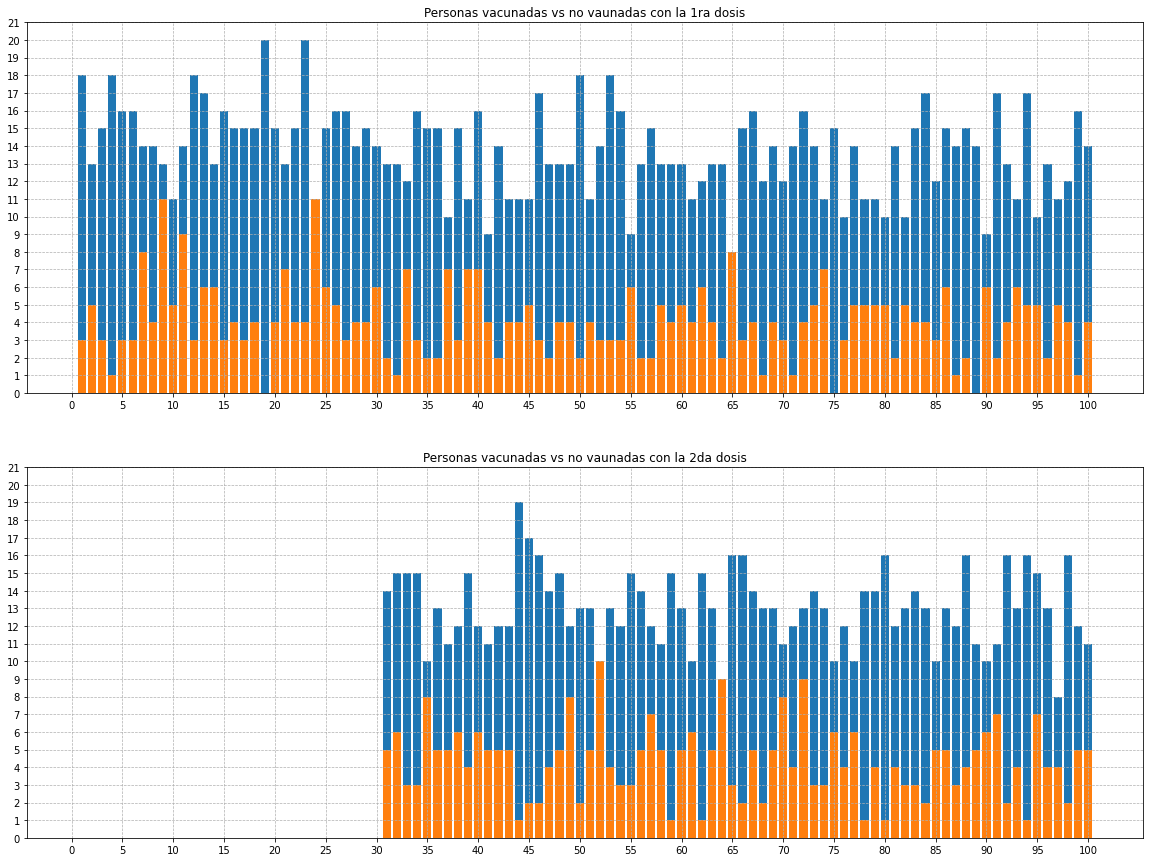

In [109]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
ax1.set_title('Personas vacunadas vs no vaunadas con la 1ra dosis')
ax1.bar(x, vacunados1)
ax1.bar(x, no_vacunados1)
ax1.grid(linestyle='--', linewidth=0.7)
ax1.set_xticks(np.arange(0,101,5))
ax1.set_yticks(np.arange(22))

ax2.set_title('Personas vacunadas vs no vaunadas con la 2da dosis')
ax2.bar(x, vacunados2)
ax2.bar(x, no_vacunados2)
ax2.grid(linestyle='--', linewidth=0.7)
ax2.set_xticks(np.arange(0,101,5))
ax2.set_yticks(np.arange(22))
fig.show()

[1] http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf
